In [2]:
options (warn = -1)
library(tidyverse)
library(reshape)
library(ggplot2)
library(ggpubr)
library(RColorBrewer)

# 159 relationships in 33D

In [3]:
# Organize relationship score
regions = c(
    # English
    'USA','UK','Australia','South Africa',
    # Germany
    'Germany',
    # Japanese
    'Japan',
    # Hebrew
    'Israel',
    # Chinese
    'CHN','HK(region)',

    # French
    'France',
    # Spanish
    'Spain','Mexico','Chile',
    # Portuguese
    'Portugal','Brazil',
    # Russian
    'Russia',
    # Arabic
    'Egypt','Qatar',
    'India')

In [4]:
file_path = '../DataCleanPCA/output_data/cleaning_results/'

raw_data_list = list()
for (region in dir(file_path)){
    file = paste(file_path,region,sep='')
    file = paste(paste(file,'/',sep=''),region,sep='')
    file = paste(file,'_dim_rel_scaled.csv',sep='')
    raw_df = read.csv(file,row.names=1)
    
    region = gsub('HK','HK(region)',region) 
    region = gsub('South_africa','South Africa',region)
    
    # The dimension should be reversed due to the questionnair set
    if (region %in% c('Chile','Mexico','Spain')){
        raw_df['Goods.Exchange'] = -raw_df['Goods.Exchange']}
    if (region %in% c('Israel')){
        raw_df['Socioemotional'] = -raw_df['Socioemotional']
        raw_df['Synchronicity'] = -raw_df['Synchronicity']}
    if (region %in% c('Brazil','Portugal','Russia')){
        raw_df['Morality'] = -raw_df['Morality']}
    if (region %in% c('France')){
        raw_df['Formality.and.Regulation'] = -raw_df['Formality.and.Regulation']
        raw_df['Expected.Reciprocity'] = -raw_df['Expected.Reciprocity']
        raw_df['Information.Exchange'] = -raw_df['Information.Exchange']
        raw_df['Money.Exchange'] = -raw_df['Money.Exchange']
        raw_df['Mating'] = -raw_df['Mating']
        raw_df['Importance.for.society'] = -raw_df['Importance.for.society']
        raw_df['Importance.for.individuals'] = -raw_df['Importance.for.individuals']
        raw_df['Occupational'] = -raw_df['Occupational']}

    raw_data_list[[region]] = raw_df}

In [5]:
relationships = read.csv('../DataCleanPCA/input_data/RelDim_labels/159relationships_fix_label.csv',
                        row.names=1)
relationships = relationships$'X0'

In [6]:
rel_33d_dict = list()
rel_loocv_dict = list()
for (rel in relationships){
    # 1.each relationship(key) contain 19 region's rating on 33 dimensions
    rel_33d_df = t(raw_data_list[[regions[1]]][rel,])
    for (region in regions[2:19]){
        rel_33d_df = cbind(rel_33d_df,t(raw_data_list[[region]][rel,]))}
    colnames(rel_33d_df) = regions
    rel_33d_dict[[rel]] = rel_33d_df
    
    loocv_rel_list = c()
    # 2.caculate LOOCV
    for (region in regions){
        remove_one = rel_33d_df[,region]
        rel_33d_df_leave_one_out = rel_33d_df[,-which(colnames(rel_33d_df)==region)]
        rel_33d_df_leave_one_out_avg = apply(rel_33d_df_leave_one_out,1,mean)
        loocv_rel_list = c(loocv_rel_list,cor(remove_one,
                    rel_33d_df_leave_one_out_avg,method = 'spearman'))
    rel_loocv_dict[[rel]] = loocv_rel_list
    }
}

rel_loocv_df = data.frame(matrix(NA,nrow=19,ncol=159))
colnames(rel_loocv_df) = relationships
rownames(rel_loocv_df) = regions
for (rel in relationships){rel_loocv_df[rel] = rel_loocv_dict[[rel]]}
rel_loocv_df = data.frame(t(rel_loocv_df))

# reorder relationships base on mean of loocv
rel_loocv_df['mean'] = apply(rel_loocv_df,1,mean)
rel_loocv_df = rel_loocv_df[order(rel_loocv_df$'mean'),]
rel_loocv_df = data.frame(t(rel_loocv_df),check.names=FALSE)
rel_loocv_df = rel_loocv_df[-c(20),] # remove mean
rel_loocv_df

,Between brothers-in-arms,Guest and Host,Between alumni,Victim and Witness,Between church members,Between religious followers,Predecessor and Successor,Student and Dorm Resident assistant,Patient and Caretaker,Director and Performer,...,Uncle and Niece/Nephew,Wife and Husband,Between business rivals,Fiance and Fiancee,Parent and Child,Prostitute and Customer,Mother and Infant,Parent and Infant,Between twins,Grandparent and Grandchild
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USA,0.6250000,0.63970588,0.77740642,0.7683824,0.69819519,0.5631684,0.73863636,0.35895722,0.7349599,0.78008021,...,0.9014037,0.8676471,0.8663102,0.8201872,0.8191845,0.9024064,0.8151738,0.8913770,0.7917781,0.9151070
UK,0.6052807,0.44117647,0.43883690,0.5083556,0.77707219,0.7042112,0.65708556,0.27606952,0.4535428,0.60528075,...,0.9351604,0.6667781,0.7864305,0.6858289,0.6737968,0.8629679,0.8292112,0.8566176,0.7967914,0.8666444
Australia,0.6995321,0.71457219,0.86697861,0.6928476,0.81250000,0.7426471,0.32586898,0.56216578,0.7774064,0.62800802,...,0.9161096,0.8258690,0.8843583,0.9047460,0.8850267,0.8626337,0.9117647,0.8272059,0.9364973,0.8653075
South.Africa,0.3836898,0.38669786,0.81149733,0.7299465,0.68148396,0.7473262,0.42045455,0.53375668,0.5093583,0.66677807,...,0.9087567,0.8716578,0.8475936,0.8425802,0.8760027,0.9177807,0.9054144,0.7891043,0.9605615,0.8516043
Germany,-0.0598262,0.87901070,0.56818182,0.4592246,0.69217914,0.5865642,0.76570856,0.80614973,0.7987968,0.67847594,...,0.8506016,0.8810160,0.8449198,0.8953877,0.8519385,0.9097594,0.8977273,0.8248663,0.9341578,0.9077540
Japan,0.5213904,0.54344920,0.07586898,0.5334225,0.67179144,0.6390374,0.76537433,0.71590909,0.6366979,0.43649733,...,0.8633021,0.9512032,0.8820187,0.9131016,0.9027406,0.9395053,0.8910428,0.8482620,0.9034091,0.8833556
Israel,0.4923128,0.65340909,0.81818182,0.7289439,0.62800802,0.6791444,0.57419786,0.68415775,0.7496658,0.53475936,...,0.9324866,0.8679813,0.9187834,0.8887032,0.8656417,0.8816845,0.8816845,0.8800134,0.9545455,0.8669786
CHN,0.6510695,0.62199198,0.22560160,0.5648396,0.40608289,0.6393717,0.72593583,0.63602941,0.2613636,0.73930481,...,0.8064840,0.8365642,0.8556150,0.8729947,0.9097594,0.8887032,0.8823529,0.9134358,0.9047460,0.9020722
HK.region.,0.5795455,0.53776738,0.40407754,0.6624332,0.22894385,0.6326872,0.77339572,0.38903743,0.3920455,0.34324866,...,0.7225936,0.8034759,0.7817513,0.8669786,0.8653075,0.9117647,0.8231952,0.7406417,0.8997326,0.8048128


In [7]:
rel_loocv_df_avg = apply(rel_loocv_df,2,mean)
rel_loocv_df_avg = data.frame(rel_loocv_df_avg)
write.csv(rel_loocv_df_avg,'rel_loocv_df_avg.csv')

In [8]:
rel_loocv_df$'region' = rownames(rel_loocv_df)
rel_loocv_df_melt = melt(rel_loocv_df,id.vars=c('region'))
head(rel_loocv_df_melt,10)

,region,variable,value
,<chr>,<fct>,<dbl>
1,USA,Between brothers-in-arms,0.6250000
2,UK,Between brothers-in-arms,0.6052807
3,Australia,Between brothers-in-arms,0.6995321
4,South.Africa,Between brothers-in-arms,0.3836898
5,Germany,Between brothers-in-arms,-0.0598262
6,Japan,Between brothers-in-arms,0.5213904
7,Israel,Between brothers-in-arms,0.4923128
8,CHN,Between brothers-in-arms,0.6510695
9,HK.region.,Between brothers-in-arms,0.5795455


In [9]:
# add 6 clusters derived from Study2
clusters_6k=read.csv('../../Study2/output_data/group/category/cluster_results/umap_exp_results_159r_all_fixlabel.csv',
                       row.names = 1)

In [10]:
Hostile = rownames(clusters_6k[clusters_6k['cl_k6'] == 5,])
print(paste('Hostile:',length(Hostile)))
Hostile
Familial = rownames(clusters_6k[clusters_6k['cl_k6'] == 2,])
print(paste('Familial:',length(Familial)))
Familial
Romantic = rownames(clusters_6k[clusters_6k['cl_k6'] == 3,])
print(paste('Romantic:',length(Romantic)))
Romantic
Affiliative = rownames(clusters_6k[clusters_6k['cl_k6'] == 1,])
print(paste('Affiliative:',length(Affiliative)))
Affiliative
Transactional = rownames(clusters_6k[clusters_6k['cl_k6'] == 4,])
print(paste('Transactional:',length(Transactional)))
Transactional
Power = rownames(clusters_6k[clusters_6k['cl_k6'] == 0,])
print(paste('Power:',length(Power)))
Power

[1] "Hostile: 25"


[1] "Between business rivals"              
 [2] "Police officer and Offender"          
 [3] "Criminal and Prosecutor"              
 [4] "Parole officer and Parolee"           
 [5] "Between divorced spouses"             
 [6] "Bully and Victim"                     
 [7] "Victim and Criminal"                  
 [8] "Guard and Prisoner"                   
 [9] "Between competitors in sports"        
[10] "Between fans of opposing sports teams"
[11] "Defendant and Plaintiff"              
[12] "Man Wife and Man Mistress"            
[13] "Between ex-lovers"                    
[14] "Between opposing negotiators"         
[15] "Celebrity and Haters"                 
[16] "Between political opponents"          
[17] "Between enemies"                      
[18] "Criminal and Hostage"                 
[19] "Slave and Master"                     
[20] "Between frenemies"                    
[21] "Between sports rivals"                
[22] "Police officer and Civilian"          
[23] "Criminal and Police officer"          
[24] "Between romantic rivals"              
[25] "Master and Servant"

[1] "Familial: 23"


[1] "Uncle and Niece/Nephew"                   
 [2] "Between close relatives"                  
 [3] "Between a person and their in-laws"       
 [4] "Between distant relatives"                
 [5] "Mother and Infant"                        
 [6] "Between second cousins"                   
 [7] "Ancestor and Descendant"                  
 [8] "Godparent and Godchild"                   
 [9] "Between twins"                            
[10] "Parent and Child"                         
[11] "Brother and Sister"                       
[12] "Aunt and Niece/Nephew"                    
[13] "Between step-siblings"                    
[14] "Step-parent and Step-child"               
[15] "Between cousins"                          
[16] "Between half-siblings"                    
[17] "Parent and Teenager"                      
[18] "Foster-parent and Foster-child"           
[19] "Between Siblings"                         
[20] "Between adoptive parents and adopted kids"
[21] "Step-grandparent and Step-grandchild"     
[22] "Parent and Infant"                        
[23] "Grandparent and Grandchild"

[1] "Romantic: 13"


[1] "Between long-distance lovers"                
 [2] "Sugar-daddy and Sugar-baby"                  
 [3] "Between a person and their deceased spouse"  
 [4] "Between life-partners"                       
 [5] "Between romantic lovers"                     
 [6] "Between soul-mates"                          
 [7] "Fiance and Fiancee"                          
 [8] "Between a person and their crush"            
 [9] "Between a person and their significant other"
[10] "Between friends with benefits"               
[11] "Wife and Husband"                            
[12] "Man and His Mistress"                        
[13] "Bride and Groom"

[1] "Affiliative: 33"


[1] "Between a person and their social media follower"
 [2] "Between alumni"                                  
 [3] "Between childhood friends"                       
 [4] "Between peers"                                   
 [5] "Groom and Groomsman"                             
 [6] "Between friends"                                 
 [7] "Between strangers"                               
 [8] "Between teammates in sports"                     
 [9] "Between companions"                              
[10] "Between sorority sisters"                        
[11] "Between diplomats"                               
[12] "Between cohabitants"                             
[13] "Between casual acquaintances"                    
[14] "Between criminal and their accomplice"           
[15] "Between Business Partners"                       
[16] "Between neighbors"                               
[17] "Between fraternity brothers"                     
[18] "Between fans of the same sports team"            
[19] "Between roommates"                               
[20] "Between pen-friends"                             
[21] "Between church members"                          
[22] "Between political allies"                        
[23] "Between Facebook Friends"                        
[24] "Between Close Friends"                           
[25] "Victim and Witness"                              
[26] "Between classmates"                              
[27] "Bride and Bridesmaid"                            
[28] "Between a person and their family friends"       
[29] "Between playmates"                               
[30] "Between religious followers"                     
[31] "Between confidants"                              
[32] "Between Co-workers"                              
[33] "Between brothers-in-arms"

[1] "Transactional: 30"


[1] "Native and Tourist"              "Driver and Passenger"           
 [3] "Nurse and Patient"               "Representative and Citizen"     
 [5] "Reviewer and Writer"             "Entrepreneur and Investor"      
 [7] "Dealer and Buyer"                "Reader and Writer"              
 [9] "Patient and Caretaker"           "Psychologist and Client"        
[11] "Therapist and Patient"           "Politician and Supporter"       
[13] "Landlord and Tenant"             "Doctor and Patient"             
[15] "Prostitute and Customer"         "Researcher and Research Subject"
[17] "Lawyer and Client"               "Guide and Tourist"              
[19] "Salesperson and Customer"        "Drug dealer and Addict"         
[21] "Consultant and Client"           "Customer and Businessman"       
[23] "Chef and Customer"               "Performer and Audience"         
[25] "Guest and Host"                  "Babysitter and Infant"          
[27] "Television host and Guest"       "Customer and Server"            
[29] "Celebrity and Fans"              "Judge and Contestant"

[1] "Power: 35"


[1] "Student and Dorm Resident assistant" 
 [2] "Union leader and union member"       
 [3] "Intern and Employee"                 
 [4] "Mentor and Mentee"                   
 [5] "Religious leader and Congregant"     
 [6] "Teacher and Student"                 
 [7] "Employer and Employee"               
 [8] "Supervisor and Subordinate"          
 [9] "Team Captain and Team Members"       
[10] "Predecessor and Successor"           
[11] "Interviewer and Job applicant"       
[12] "Officer and Soldier"                 
[13] "Between a monarch and their minister"
[14] "Professor and Graduate student"      
[15] "Director and Performer"              
[16] "Athletic trainer and Trainee"        
[17] "Doctor and Nurse"                    
[18] "Landlord and Housekeeper"            
[19] "Foreman and Laborer"                 
[20] "Superior and Subordinate"            
[21] "Club Member and Club President"      
[22] "Chief and Deputy"                    
[23] "Athlete and Referee"                 
[24] "Principal and Teacher"               
[25] "Judge and Lawyer"                    
[26] "Coach and athlete"                   
[27] "University student and Administrator"
[28] "Leader and Follower"                 
[29] "Man and God"                         
[30] "Volunteer and Organizer"             
[31] "Manager and Staff"                   
[32] "Owner and Manager"                   
[33] "Manager and Assistant"               
[34] "Boss and Secretary"                  
[35] "Professor and Teaching Assistant"

In [11]:
rel_loocv_df_melt_group = rel_loocv_df_melt %>% mutate(group=case_when(variable%in%Hostile~'Hostile',
                                            variable%in%Familial~'Familial',
                                            variable%in%Romantic~'Romantic',
                                            variable%in%Affiliative~'Affiliative',
                                            variable%in%Transactional~'Transactional',
                                            variable%in%Power~'Power'))
rel_loocv_df_melt_group$'group' = factor(rel_loocv_df_melt_group$'group', 
                            levels=c('Hostile',
                                     'Familial','Romantic','Affiliative',
                                     'Transactional','Power'))

png 
  2

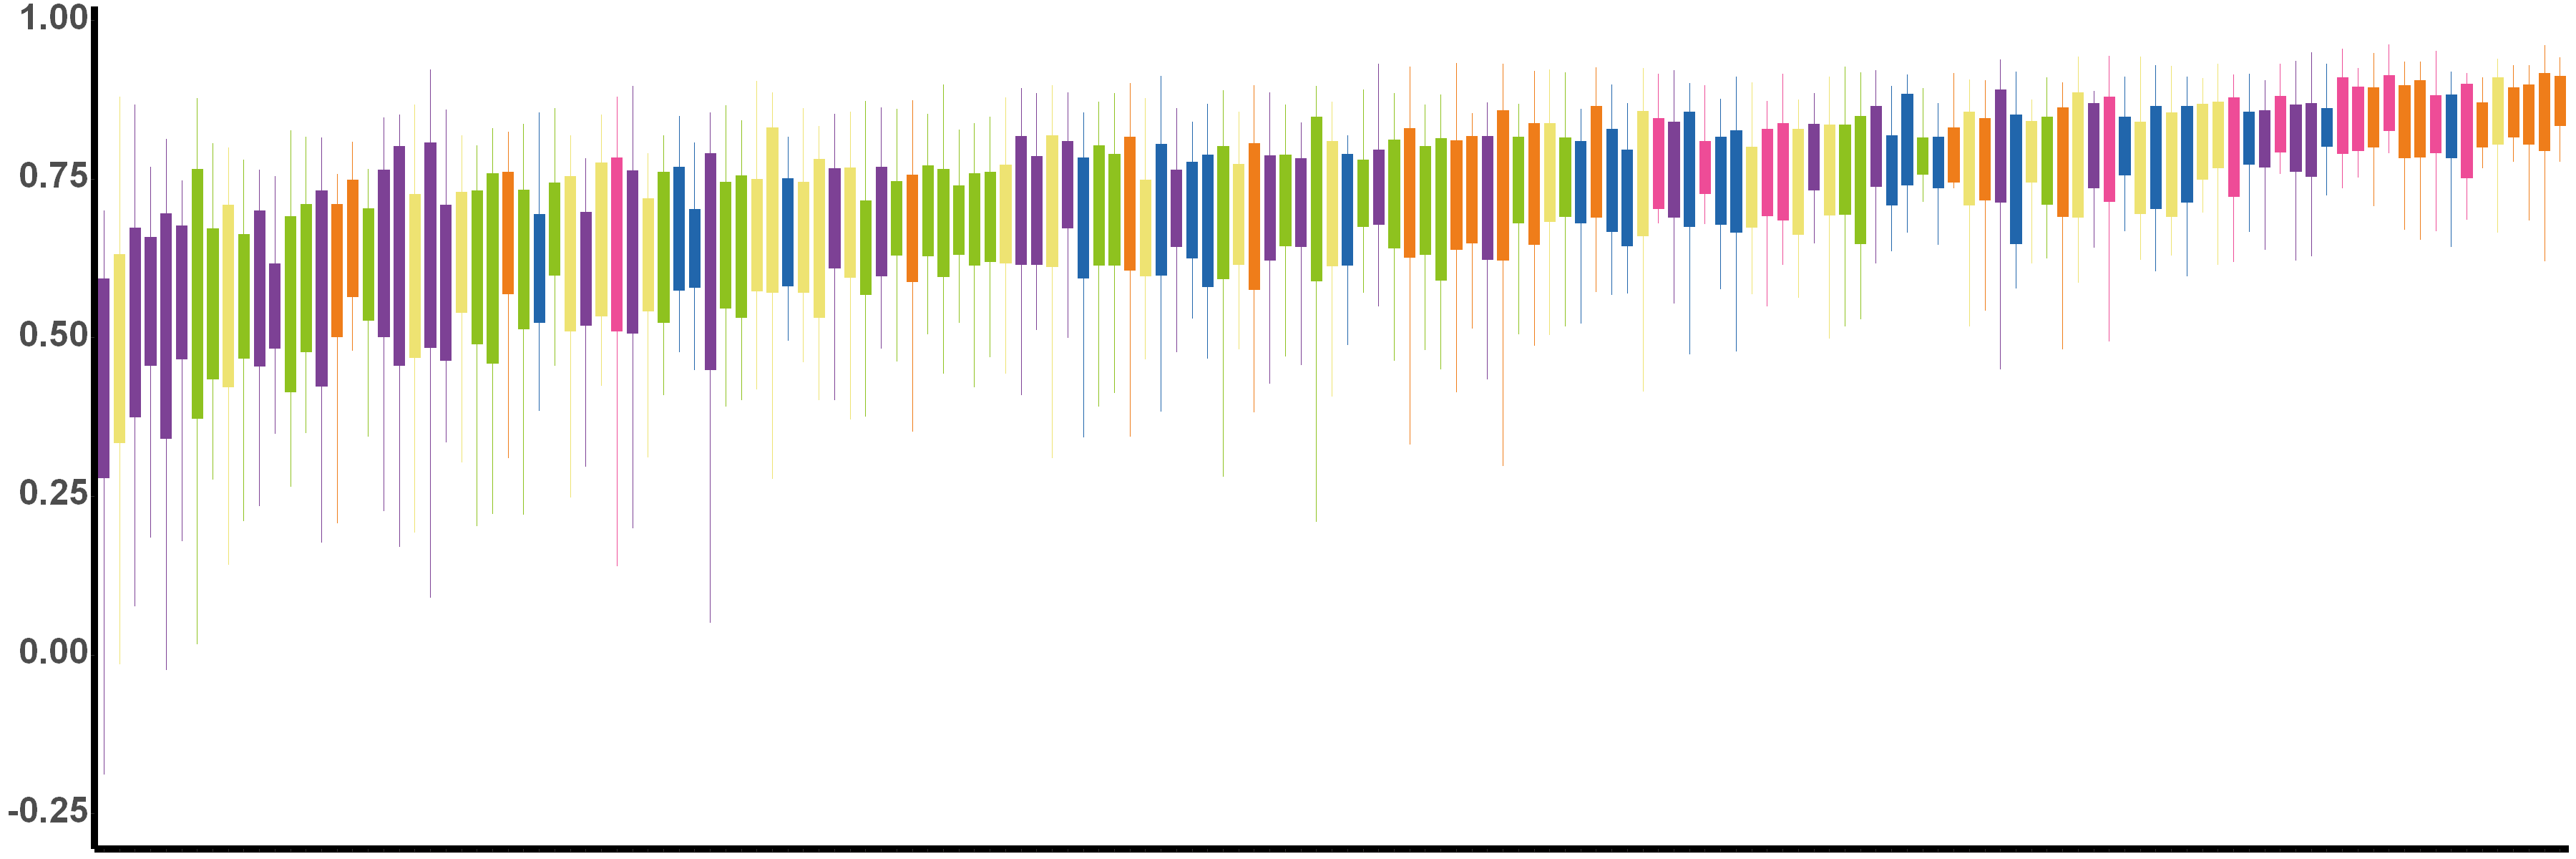

In [12]:
options(repr.plot.height=10,repr.plot.width=30)
ggboxplot(rel_loocv_df_melt_group,x='variable',y='value',
          fill='group',color='group',outlier.shape = NA,
          palette = c('#2166AC',
                      '#EF7D1A','#EE4C97','#7D4195',
                      '#EEE372','#8EC21F'))+
#ylim(0,1)+
theme_classic()+
theme(#axis.text.x=element_text(size=30,face='bold'),
      axis.text.x=element_blank(),
      axis.text.y=element_text(size=30,face='bold'),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_text(size=35,face='bold'),
      legend.position = 'none')

######################
png("../output_graph/LOOCV_RelationsIn33D.png", bg="transparent",
    family = 'sans',units='in',width=30,height=10,res=300)
ggboxplot(rel_loocv_df_melt_group,x='variable',y='value',
          fill='group',color='group',outlier.shape = NA,
          palette = c('#2166AC',
                      '#EF7D1A','#EE4C97','#7D4195',
                      '#EEE372','#8EC21F'))+
#ylim(0,1)+
theme_classic()+
theme(#axis.text.x=element_text(size=30,face='bold'),
      axis.text=element_blank(),
      #axis.text.y=element_text(size=30,face='bold'),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_text(size=35,face='bold'),
      legend.position = 'none')
dev.off()

# 3 clusters in 33D

In [13]:
Public = c(Transactional,Power)
Private = c(Familial,Romantic,
 'Between childhood friends','Groom and Groomsman','Between friends',
 'Between companions',#'Between sorority sisters',
 'Between cohabitants',#'Between fraternity brothers',#'Between roommates',
 'Between pen-friends','Between Facebook Friends','Between Close Friends',
 'Bride and Bridesmaid','Between a person and their family friends',
 'Between playmates','Between confidants')

In [14]:
Hostile_loocv = apply(rel_loocv_df[,Hostile],1,mean)
mean(Hostile_loocv)
Public_loocv = apply(rel_loocv_df[,Public],1,mean)
mean(Public_loocv)
Private_loocv = apply(rel_loocv_df[,Private],1,mean)
mean(Private_loocv)

[1] 0.7276696

[1] 0.6731876

[1] 0.738894

In [16]:
library(rstatix)
library(DescTools) #Fisher Z

In [17]:
hpp_loocv = cbind(Hostile_loocv,Public_loocv,Private_loocv)
hpp_loocv = data.frame(hpp_loocv)
colnames(hpp_loocv) = c('Hostile','Public','Private')
hpp_loocv_plot <- hpp_loocv %>% mutate("Region" = rownames(hpp_loocv)) %>%
  gather(key = "Cluster", value = "loocv", Hostile, Private, Public) %>%
  convert_as_factor(Region, Cluster)

hpp_loocv = FisherZ(hpp_loocv)
hpp_loocv <- hpp_loocv %>% mutate("Region" = rownames(hpp_loocv)) %>%
  gather(key = "Cluster", value = "loocv", Hostile, Private, Public) %>%
  convert_as_factor(Region, Cluster)
head(hpp_loocv, 3)

res.aov = anova_test(
    data = hpp_loocv,dv = loocv, wid = Region,
    within = Cluster)
get_anova_table(res.aov)

# pairwise comparisons
pwc <- hpp_loocv %>%
  pairwise_t_test(
    loocv ~ Cluster, paired = TRUE,
    p.adjust.method = "bonferroni"
    )
pwc

,Region,Cluster,loocv
,<fct>,<fct>,<dbl>
1,USA,Hostile,1.0162031
2,UK,Hostile,0.9839546
3,Australia,Hostile,1.1280406


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Cluster,2,36,41.113,5.07e-10,*,0.094


,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,loocv,Hostile,Private,19,19,-2.014915,18,5.90e-02,1.77e-01,ns
2,loocv,Hostile,Public,19,19,7.328696,18,8.34e-07,2.50e-06,****
3,loocv,Private,Public,19,19,10.070418,18,8.02e-09,2.41e-08,****


png 
  2

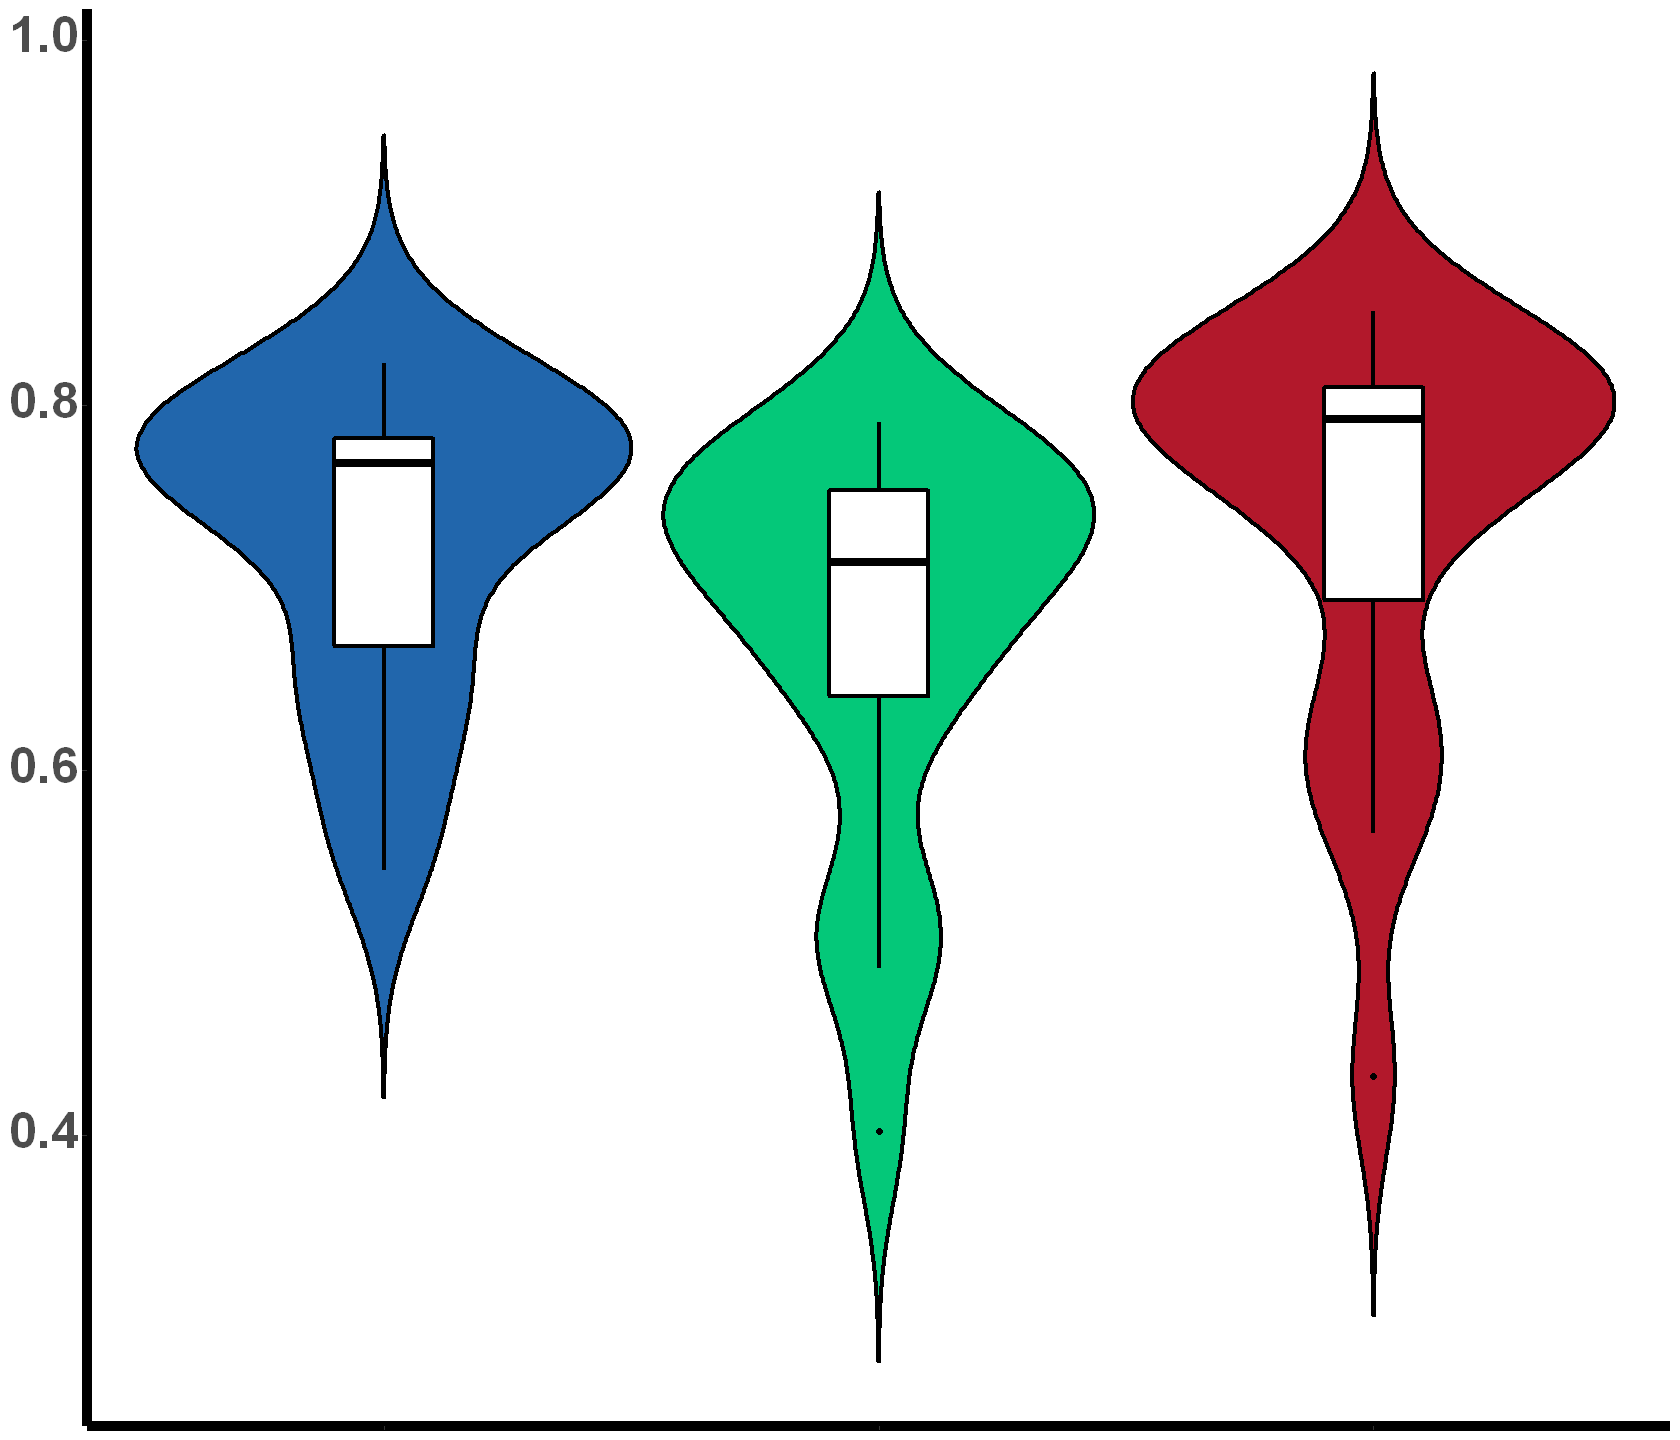

In [18]:
options(repr.plot.width=14, repr.plot.height=12)
ggviolin(hpp_loocv_plot, x="Cluster", y="loocv", fill = "Cluster",
         size = 1.2,order = c('Hostile','Public','Private'),
  palette = c('#2166AC','#04C879','#B2182B'),  
         add = c("boxplot"),
         add.params = list(fill = "white",size = 1.2))+

theme_classic()+
theme(#axis.text.x=element_text(size=30,face='bold'),
      axis.text.x=element_blank(),
      axis.text.y=element_text(size=30,face='bold'),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_text(size=35,face='bold'),
      legend.position = 'none')

png("../output_graph/LOOCV_ClustersIn33D.png", bg="transparent",
    family = 'sans',units='in',width=14,height=12,res=300)
ggviolin(hpp_loocv_plot, x="Cluster", y="loocv", fill = "Cluster",
         size = 1.2,order = c('Hostile','Public','Private'),
  palette = c('#2166AC','#04C879','#B2182B'),  
         add = c("boxplot"),
         add.params = list(fill = "white",size = 1.2))+

theme_classic()+
theme(axis.text=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=3),
      legend.title = element_text(size=35,face='bold'),
      legend.position = 'none')
dev.off()